In [1]:
from defectlib import extract_features_from_defect, train_svm_classifier, plot_tsne
import numpy as np
%matplotlib inline

Using TensorFlow backend.


In [2]:
features, labels, sns, images = extract_features_from_defect('./reverse/W2BPF-RF/', comb=False)
features_test, labels_test, sns_test, images_test = extract_features_from_defect('./defect_tensors_D10/W2BRFRF/', comb=True)

features_all = np.concatenate((features, features_test))
labels_all = np.concatenate((labels, labels_test))
sns_all = np.concatenate((sns, sns_test))
images_all = np.concatenate((images, images_test))

there are 23 images inside W2BPF-RF_8A_c10
Processing ./reverse/W2BPF-RF/8A/W2BPF-RF_8A_c10/F3Y64820MGQGY4RA 8AAAAAA_2.jpg...
there are 53 images inside W2BPF-RF_2A_c0
Processing ./defect_tensors_D10/W2BRFRF/2A/W2BPF-RF_2A_c0/W2BRF-RF_Recombination_0_2A_0.jpg...
there are 8 images inside W2BPF-RF_2A_c10
Processing ./defect_tensors_D10/W2BRFRF/2A/W2BPF-RF_2A_c10/W2BPF-RF_Recombination_F3Y64940NLLGY4TA_2A_0.jpg...
there are 11 images inside W2BPF-RF_6A_c0
Processing ./defect_tensors_D10/W2BRFRF/6A/W2BPF-RF_6A_c0/W2BRF-RF_Recombination_0_6A_0.jpg...
there are 2 images inside W2BPF-RF_6A_c10
Processing ./defect_tensors_D10/W2BRFRF/6A/W2BPF-RF_6A_c10/W2BPF-RF_Recombination_F3Y64940NLLGY4TA_6A_0.jpg...


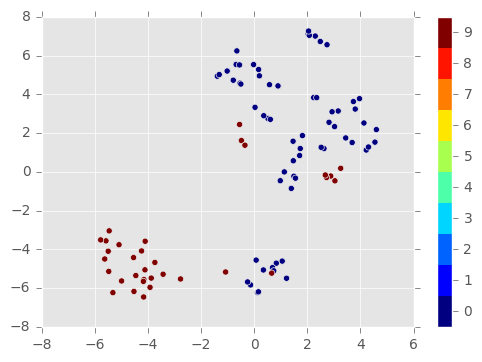

In [3]:
plot_tsne(features_all, labels_all, images_all, perplexity=30, interactive=False)

In [5]:
train_svm_classifier(features_all, labels_all, sns_all, 'model.model', split=True)

train test split == True
Fitting 3 folds for each of 20 candidates, totalling 60 fits
[CV] kernel=linear, C=1 ..............................................
[CV] ............... kernel=linear, C=1, score=0.840000, total=   0.0s
[CV] kernel=linear, C=1 ..............................................
[CV] ............... kernel=linear, C=1, score=0.916667, total=   0.0s
[CV] kernel=linear, C=1 ..............................................
[CV] ............... kernel=linear, C=1, score=1.000000, total=   0.0s
[CV] kernel=linear, C=10 .............................................
[CV] .............. kernel=linear, C=10, score=0.840000, total=   0.0s
[CV] kernel=linear, C=10 .............................................
[CV] .............. kernel=linear, C=10, score=0.916667, total=   0.0s
[CV] kernel=linear, C=10 .............................................
[CV] .............. kernel=linear, C=10, score=1.000000, total=   0.0s
[CV] kernel=linear, C=100 ....................................

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


[CV] ............ kernel=linear, C=1000, score=0.840000, total=   0.0s
[CV] kernel=linear, C=1000 ...........................................
[CV] ............ kernel=linear, C=1000, score=0.916667, total=   0.0s
[CV] kernel=linear, C=1000 ...........................................
[CV] ............ kernel=linear, C=1000, score=1.000000, total=   0.0s
[CV] kernel=rbf, C=1, gamma=0.01 .....................................
[CV] ...... kernel=rbf, C=1, gamma=0.01, score=0.800000, total=   0.0s
[CV] kernel=rbf, C=1, gamma=0.01 .....................................
[CV] ...... kernel=rbf, C=1, gamma=0.01, score=0.916667, total=   0.0s
[CV] kernel=rbf, C=1, gamma=0.01 .....................................
[CV] ...... kernel=rbf, C=1, gamma=0.01, score=0.956522, total=   0.0s
[CV] kernel=rbf, C=1, gamma=0.001 ....................................
[CV] ..... kernel=rbf, C=1, gamma=0.001, score=0.680000, total=   0.0s
[CV] kernel=rbf, C=1, gamma=0.001 ....................................
[CV] .

[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed:    1.3s finished


GridSearchCV(cv=3, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=True, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid=[{'kernel': ['linear'], 'C': [1, 10, 100, 1000]}, {'kernel': ['rbf'], 'C': [1, 10, 100, 1000], 'gamma': [0.01, 0.001, 0.0001, 1e-05]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=3)

In [6]:
from bokeh.plotting import figure, output_notebook
output_notebook()
from bokeh.plotting import figure, show
from tsne import bh_sne

Loading BokehJS ...

In [7]:
for label_class in set(labels_all):
    sns_in_label = sns_all[labels_all == label_class]
    print 'the number of class {} is {}'.format(label_class, len(sns_in_label))
    print 'the number of S/Ns: is {}'.format(len(set(sns_in_label)))
    for sn in set(sns_in_label):
        print '\tthe number of S\N {}:{}'.format(sn, len(sns_all[(labels_all == label_class) & (sns_all == sn)]))

the number of class 10 is 33
the number of S/Ns: is 25
	the number of S\N F3Y65020LVYGY4RA:1
	the number of S\N F3Y65031JW2GY4TA:1
	the number of S\N F3Y649508YVGY4RA:1
	the number of S\N F3Y65030KXEGY4RA:1
	the number of S\N F3Y65031FGUGY4TA:1
	the number of S\N F3Y64961GTRGY4TA:1
	the number of S\N F3Y64820MGQGY4RA:1
	the number of S\N F3Y65041CEUGY4TA:1
	the number of S\N F3Y650304V6GY4RA:1
	the number of S\N F3Y64910CJPGY4RA:1
	the number of S\N F3Y6486066SGY4VB:1
	the number of S\N F3Y649509BCH3RPA:6
	the number of S\N F3Y650404JPGY4RA:1
	the number of S\N F3Y64930LG7GY4RA:1
	the number of S\N F3Y65030GPVGY4TA:1
	the number of S\N F3Y65031GH8GY4TA:1
	the number of S\N F3Y65030JTVGY4TA:1
	the number of S\N F3Y650205ASGY4RA:1
	the number of S\N F3Y65013JQ2GY4TA:1
	the number of S\N F3Y65030S4EGY4RA:1
	the number of S\N F3Y650319LLGY4TA:1
	the number of S\N F3Y65040J7BGY4TA:1
	the number of S\N F3Y64940NLLGY4TA:4
	the number of S\N F3Y65010XRMGY4TA:1
	the number of S\N F3Y650305BYGY4